In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import warnings

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

/usr/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Preprocessing

In [7]:
#A10249252O9I20MRSOBVF:3QFUFYSY9ZU71A0RA11WIB75T16F4P,1,train,1,1,1273,Squid_4_5,Squid,categoryIgnore1D,
#oranges,oranges,True,5954

def stringToInt(arr, position, values):
    for i, v in enumerate(values):
        arr[arr[:,position] == v, position] = i
    return arr

#csvFile = '../data/test3.csv'
csvFile = '../data/monsters_data_strategic_052217.csv'

# Get all columns
#csv = np.genfromtxt(csvFile, dtype=np.string_, delimiter=',', skip_header=1)
# Only id(0), condition(1), state(2), category(8), correct(11) 
csv = np.genfromtxt(csvFile, dtype=np.string_, delimiter=',', usecols=(0,1,2,8,11), skip_header=1)

# Pre-process CSV
# Get unique ids
ids = [i for i in np.unique(csv[:,0]) ]
# Get conditions
cond = [co for co in np.unique(csv[:,1])]
# Get unique phases
phases = [p for p in np.unique(csv[:,2]) ]
# Get categories
categories = [c for c in np.unique(csv[:,3])]
# For converting string to int boolean
bo = [b'False', b'True']

csvInt = csv.copy()
# Convert fields to ints for easy processing
for i,j in enumerate([ids, cond, phases, categories, bo]):
    csvInt = stringToInt(csvInt, i, j)

csvInt = csvInt.astype('int')

# Get only those in free exploration phase
csvInt = csvInt[csvInt[:,2]==0]

csvInt2 = csvInt.copy()

# Remove phase column (2) (and for now also the condition column (1))
csvInt = np.delete(csvInt, (1,2), axis=1)

# Split by user
splitCsv = [csvInt[csvInt[:,0]==i] for i in np.unique(csvInt[:,0])]

# Split by condition
csvInt2 = np.delete(csvInt2, 2, axis = 1)
informed = csvInt2[csvInt2[:,1]==0]
uninformed = csvInt2[csvInt2[:,1]==1]
informed = np.delete(informed, 1, axis=1)
uninformed = np.delete(uninformed, 1, axis=1)
splitInf = [informed[informed[:,0]==i] for i in np.unique(informed[:,0])]
splitUni = [uninformed[uninformed[:,0]==i] for i in np.unique(uninformed[:,0])]

In [13]:
users = np.shape(np.unique(csvInt[:,0]))[0]#5
uInf = np.shape(np.unique(informed[:,0]))[0]
uUni = users-uInf

tasks = 4
categories = ['category1D', 'category2D', 'categoryIgnore1D', 'categoryRandom']

## Cumulative action-selection

Number of occasions a task has been selected at a specific point in time

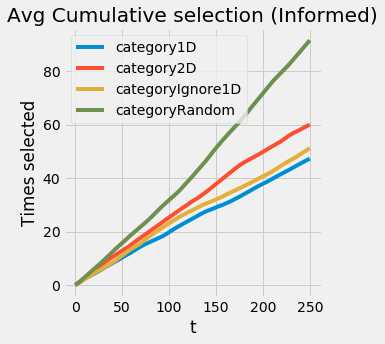

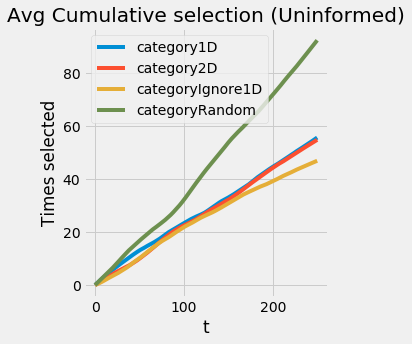

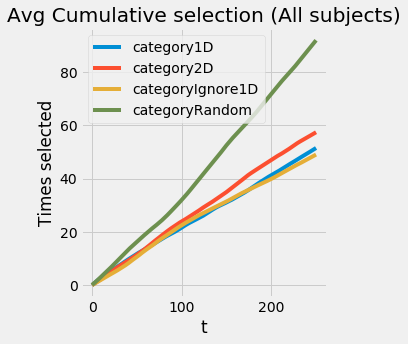

In [16]:
def plotCumSelec(arra, usersArr, title):
    
    # Count at each point in time number of occurrences up to that point and save it into a list
    def countInTime(arr, numOfValues):
        counts = []
        for i in range(len(arr)+1):
            count = [(arr[:i] == e).sum() for e in range(numOfValues)]
            counts.append(count)
        return np.array(counts).T
    
    # Every element holds a matrix of the evolution of selection
    # Each column corresponds to a t where the max t=250 (it starts at t=0 though)
    # Each column corresponds to the cumulative selection of a task at time t
    cumCounts = []
    for u in range(usersArr):
        # Cumulative count for user u per task
        cumCounts.append( countInTime(arra[u][:,1], tasks) )

    # Dimensions 201x4x251 (201 users, 4 tasks, 251 time steps)
    # Get averages and std dev
    cumCounts = np.asarray(cumCounts)
    avg = np.mean(cumCounts, axis=0)
    std = np.std(cumCounts, axis=0)

    fig, ax = plt.subplots(figsize=(5, 5))

    for t in range(tasks):
        graph = ax.plot(avg[t,:], label=categories[t])

    #     color = graph[0].get_color()
    #     ax.plot(avg[t,:]+std[t,:], color, alpha=0.15)
    #     plt.plot(avg[t,:]-std[t,:], color, alpha=0.15)
    ax.legend()
    ax.set_title(''.join(['Avg Cumulative selection ', title]))
    ax.set_ylabel('Times selected')
    ax.set_xlabel('t')

    plt.tight_layout()
    plt.show()

plotCumSelec(splitInf, uInf, '(Informed)')
plotCumSelec(splitUni, uUni, '(Uninformed)')
plotCumSelec(splitCsv, users, '(All subjects)')